PROYEK ANALISIS DATA: Bike Sharing Dataset

Nama: Muhammad Ariel Gibranu Athafadillah
Email: arieleuy18@gmail.com
ID Dicoding: arielgibranu

Pertanyaan
1. Apakah terdapat perbedaan signifikan dalam penyewaan sepeda pada hari kerja dibandingkan akhir pekan (atau hari libur)?
2. Apakah terdapat perbedaan signifikan dalam penyewaan sepeda pada berbagai kondisi cuaca?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA WRANGLING

Saya menggunakan dataset penyewaan sepeda per hari (day.csv) yang berisi informasi tentang penyewaan sepeda di hari kerja dan weekend ataupun hari libur. Dataset ini juga berisi informasi tentang penyewaan sepeda pada berbagai kondisi cuaca.

Gathering Data

In [2]:
day_df = pd.read_csv("D:\\Aa\\dicoding\\idcamp 2024\\Belajar Analisis Data dengan Python\\submission\\data\\Bike-sharing-dataset\\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight: Dari hasil output di atas, kita dapat melihat beberapa kolom yang ada di dalam dataset tersebut, sebagai berikut:

1. instant: Nomor urut baris.
2. dteday: Tanggal data diambil.
3. season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
4. yr: Tahun, 0 untuk 2011 dan 1 untuk 2012.
5. mnth: Bulan dari 1 hingga 12.
6. holiday: 1 jika hari tersebut libur, 0 jika bukan libur.
7. weekday: Hari dalam minggu, 0 = Minggu, 1 = Senin, dan seterusnya.
8. workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
9. weathersit: Kondisi cuaca dalam kode numerik:
   (1) Cerah, Sedikit awan, Berawan sebagian; 
   (2) Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut; 
   (3) Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan; 
   (4) Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut; 
10. temp: Suhu aktual dalam skala 0 hingga 1.
11. atemp: Suhu "feels like" atau suhu yang dirasakan.
12. hum: Kelembapan dalam skala 0 hingga 1.
13. windspeed: Kecepatan angin dalam skala 0 hingga 1.
15. casual: Jumlah pengguna casual (tanpa registrasi).
16. registered: Jumlah pengguna terdaftar.
17. cnt: Jumlah total penyewaan sepeda.

Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Insight

1. Dataset berisi 16 kolom dan 731 baris
2. Tidak ada missing value pada dataset tersebut
3. Ada 3 tipe data pada dataset tersebut, yaitu: float64, int64, object
4. kolom dteday bertipe data object, kolom ini kemungkinan merupakan value yang tidak akurat, kolom ini seharusnya bertipe data datetime

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Insight

Tidak ada duplikasi pada dataset.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


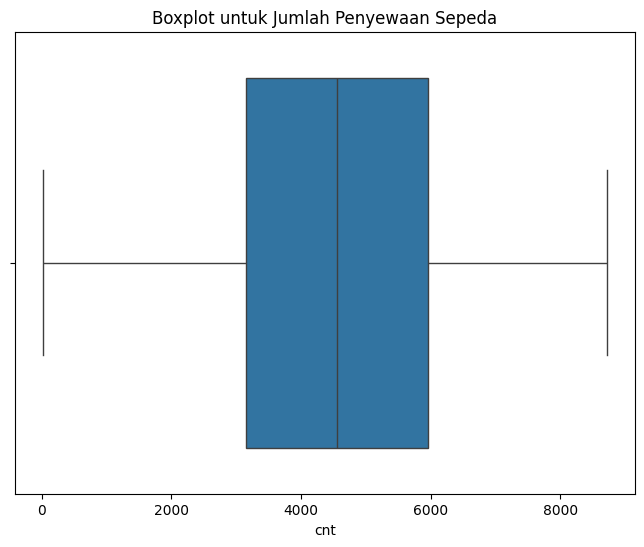

In [7]:
#mencari outlier

plt.figure(figsize=(8, 6))
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

Insight

Tidak ditemukan outlier.

Cleaning Data

In [8]:
#mengubah tipe data dteday ke datetime

# day_df.loc[:, 'dteday'] = pd.to_datetime(day_df['dteday'])

#saya mungkin tidak akan mengubah type data dteday, karena tidak akan digunakan dalam analisis ini

EDA

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight

workingday: rata-rata 0.68, berarti penyewaan sepeda cenderung lebih banyak di hari kerja.
weathershit: rata-rata 1.395, berarti penyewaan sepeda lebih banyak saat cuaca cerah.

Data Visualization dan Explanatory Analysis

Pertanyaan 1

In [10]:
sewa_sepeda_workingday = day_df.groupby(by="workingday").cnt.count()
print(sewa_sepeda_workingday)

workingday
0    231
1    500
Name: cnt, dtype: int64


In [11]:
# Membuat bar plot
# plt.figure(figsize=(8, 6))
# sns.countplot(x='workingday', data=day_df)
# plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
# plt.xlabel('Hari Kerja')
# plt.ylabel('Jumlah Penyewaan')

# 
# plt.xticks([0, 1], ['Bukan Hari Kerja', 'Hari Kerja'])

# plt.show()

#maaf ini sengaja saya komentar, buat belajar

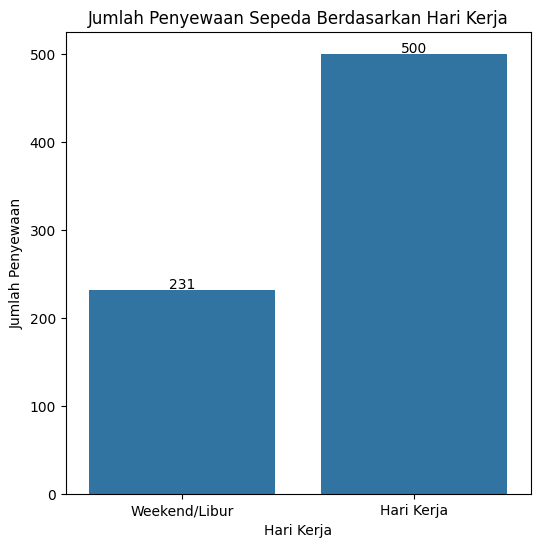

In [12]:
# Membuat bar plot
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='workingday', data=day_df)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Penyewaan')


plt.xticks([0, 1], ['Weekend/Libur', 'Hari Kerja'])

# nambahin label diatas, biar jelas jumlahnya
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4), 
                   textcoords = 'offset points')

plt.show()

Insight

Weekend/Libur: Jumlah penyewaan sepeda lebih rendah dibandingkan hari kerja yaitu 231
Hari Kerja: Jumlah penyewaan sepeda tinggi yaitu 500

In [13]:
sewa_sepeda_weathersit = day_df.groupby(by="weathersit").cnt.count()
print(sewa_sepeda_weathersit)

weathersit
1    463
2    247
3     21
Name: cnt, dtype: int64


In [14]:
# Membuat visualisasi dengan bar plot
# plt.figure(figsize=(10, 6))
# ax = sns.countplot(x='weathersit', data=day_df.sort_values(by="weathersit", ascending=True))
# plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
# plt.xlabel('Kondisi Cuaca')
# plt.ylabel('Jumlah Penyewaan')


# plt.xticks([0, 1, 2, 3], ['Cerah/Sedikit Berawan', 'Berawan/Berkabut', 'Hujan/Badai', 'Cuaca Ekstrim'])


# # nambahin label diatas, biar jelas jumlahnya
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 4), 
#                    textcoords = 'offset points')

# plt.show()

#maaf ini sengaja saya komentar, buat belajar

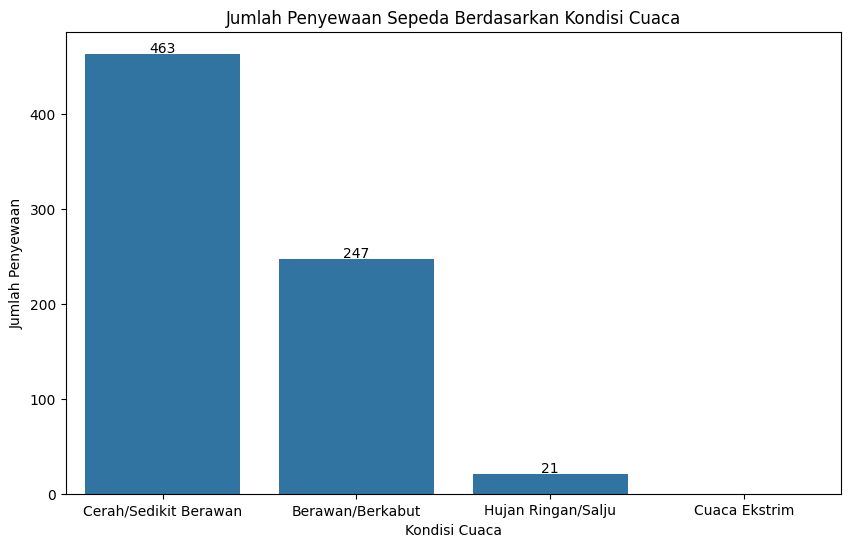

In [15]:
# Membuat visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='weathersit', data=day_df, order=[1, 2, 3, 4])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')


plt.xticks([0, 1, 2, 3], ['Cerah/Sedikit Berawan', 'Berawan/Berkabut', 'Hujan Ringan/Salju', 'Cuaca Ekstrim'])

# nambahin label diatas, biar jelas jumlahnya
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 4), 
                   textcoords='offset points')


plt.show()

Insight

Cerah/Sedikit Berawan: Jumlah penyewaan sepeda tinggi yaitu 463
Berawan/Berkabut: Jumlah penyewaan sepeda sedang yaitu 247
Hujan Ringan/Salju: Jumlah penyewaan sepeda sangat rendah yaitu 21
Cuaca Ekstrim: Tidak ada sama sekali penyewaan s

Conclusion

1. Penyewaan sepeda lebih tinggi saat hari kerja dibandingkan saat weekend/libur. Perbedaan penyewaan sepeda saat hari kerja dan weekend/libur cukup signifikan.
2. Penyewaan sepeda pada berbagai kondisi cuaca sangat beragam. Saat cerah/sedikit berawan, angka penyewaan sepeda sangat tinggi. Saat berawan/berkabut, angka penyewaan sepeda cenderung lebih rendah. Saat hujan ringan/salju, angka penyewaan sepeda sangat rendah. Saat cuaca ekstrim, tidak ada sama sekali penyewaan sepeda. Perbedaan penyewaan sepeda pada berbagai kondisi cuaca sangat signifikan, terutama pada saat hujan ringan/salju dan cuaca ekstrim